In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')  # (adjust path if needed)
training_set = data['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [3]:
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [4]:


# Build RNN model
model = models.Sequential([
    layers.SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:


history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


In [6]:
# Prediction on training set (for visualization)
predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(training_set_scaled[60:])

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


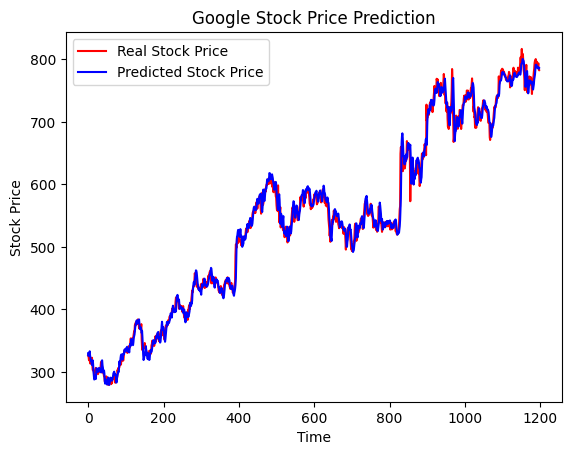

In [7]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()